In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import nltk

In [9]:
# Download the punkt tokenizer for sentence splitting
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pujit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# Load the XSum dataset
dataset = load_dataset("xsum",trust_remote_code=True)
print(dataset)


Generating train split:   0%|          | 0/204045 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11332 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11334 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 204045
    })
    validation: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11332
    })
    test: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11334
    })
})


In [12]:
# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(dataset['train'])

In [14]:
# Function to calculate lengths
def calculate_lengths(df):
    df['document_length'] = df['document'].apply(lambda x: len(x.split()))
    df['summary_length'] = df['summary'].apply(lambda x: len(x.split()))
    return df

# Calculate lengths
df = calculate_lengths(df)

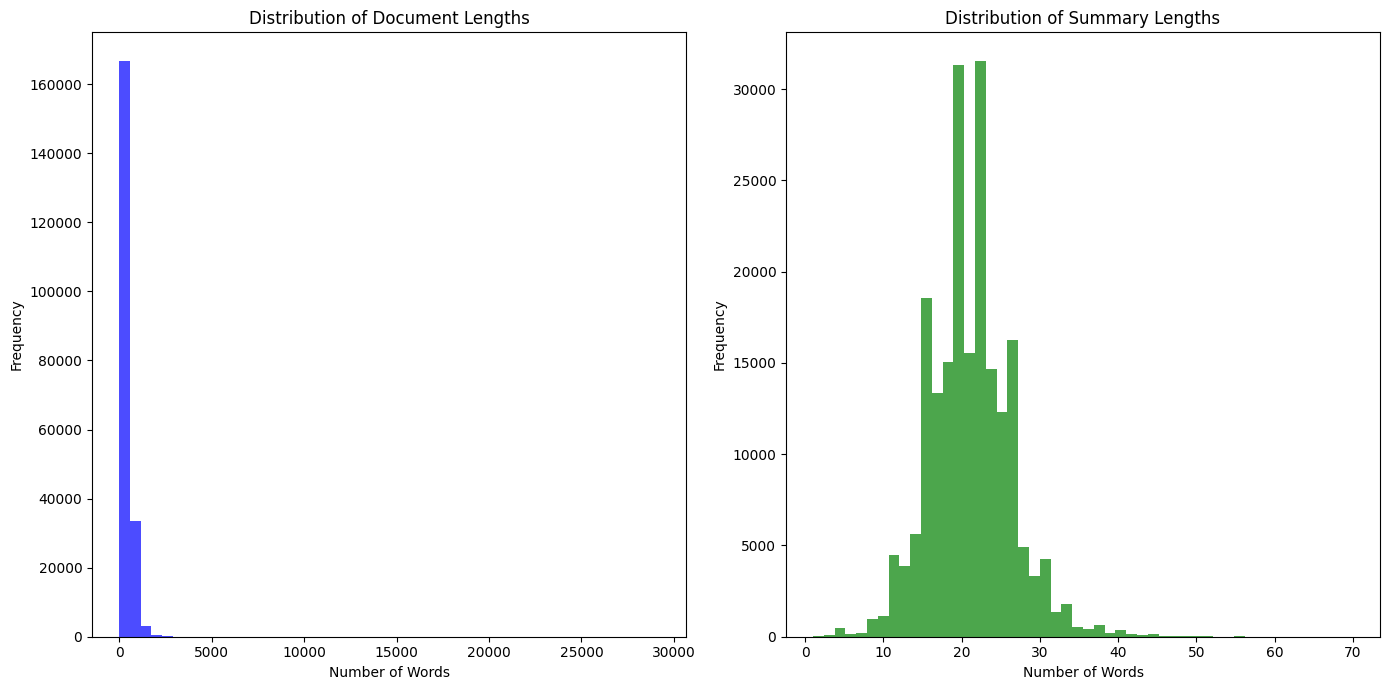

In [15]:
import matplotlib.pyplot as plt

# Plotting the lengths
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(df['document_length'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Document Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['summary_length'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Summary Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


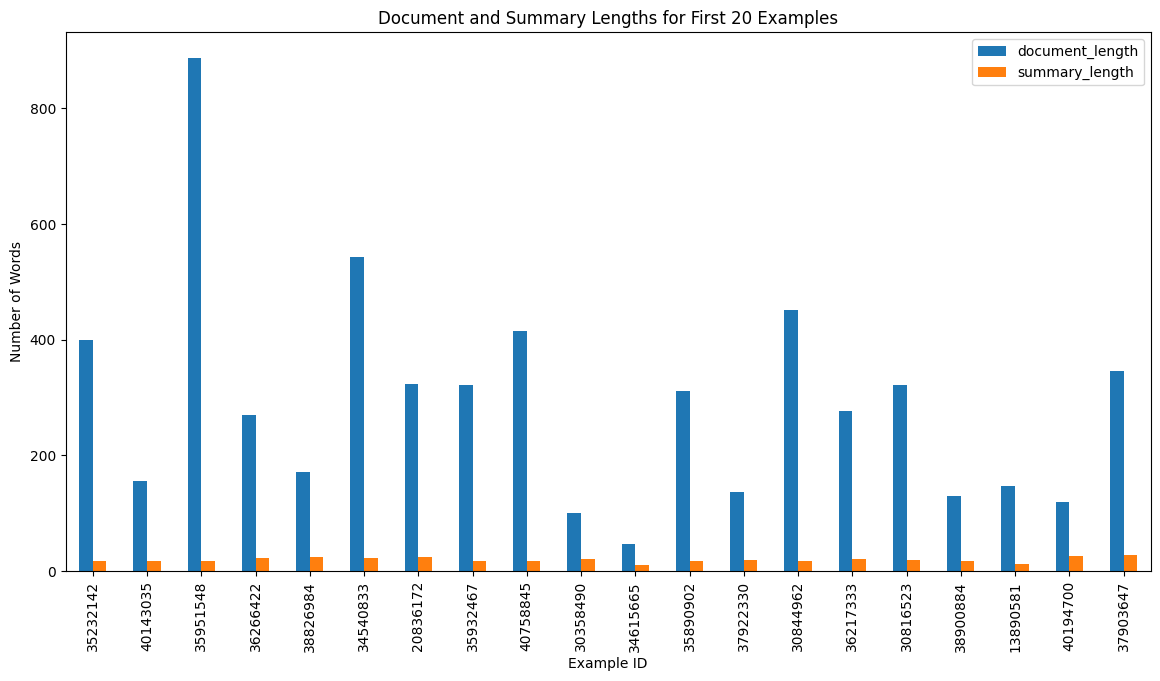

In [16]:
# Bar graph of lengths for first 20 examples
df.head(20).plot(kind='bar', x='id', y=['document_length', 'summary_length'], figsize=(14, 7))
plt.title('Document and Summary Lengths for First 20 Examples')
plt.xlabel('Example ID')
plt.ylabel('Number of Words')
plt.show()